# The age of spatial signatures

- Signatures and EPC age
    - [ ] Heatmap type x age
    - [ ] Some form of time series
- Signatures and LR
    - [ ] Time series of each class
    - [ ] Proportions over time

In [59]:
import pandas
import seaborn as sns

epc_p = '/home/jovyan/data/tmp/epc_uprn_ss_simplified.pq'
pc_p = '/home/jovyan/data/tmp/postcode_ss.pq'
pct_p = '/home/jovyan/data/tmp/sales_by_month_pc_ss.pq'

type_order = [
    'Hyper concentrated urbanity', 
    'Concentrated urbanity',
    'Metropolitan urbanity', 
    'Regional urbanity',
    'Local urbanity',
    'Dense urban neighbourhoods',
    'Dense residential neighbourhoods', 
    'Connected residential neighbourhoods', 
    'Gridded residential quarters',
    'Accessible suburbia', 
    'Disconnected suburbia', 
    'Open sprawl', 
    'Warehouse/Park land', 
    'Urban buffer', 
    'Countryside agriculture',
    'Wild countryside'
]

## EPC age

Our goal hear is to create a table where we have the number of properties listed in the EPC database by age (as recorded by the EPCs) and by spatial signature. To make this more tractable, we have manually created a mapping for all the entries in the age column to a grouping that makes easier to work with. We read the mapping and set the intended order first:

In [129]:
age_remapping = (
    pandas.read_csv('data/age_remapping.csv')
    .set_index('src')
    ['tgt']
)
age_order = [
    'Before 1900', 
    '1900-1929', 
    '1930-1949',
    '1950-1966', 
    '1967-1975', 
    '1976-1982', 
    '1983-1990', 
    '1991-1995',
    '1996-2002', 
    '2003-2006', 
    '2007 onwards', 
]

Then we read the table of all EPC properties and apply the mapping:

In [46]:
epc = pandas.read_parquet(epc_p)
epc['age_remapped'] = epc['CONSTRUCTION_AGE_BAND'].map(age_remapping)

At this point, we can create the table and write it to a `.csv` file:

In [135]:
hm = epc.groupby(['age_remapped', 'type']).size().unstack()[type_order]

hm.to_csv('data/epc_age_by_ss.csv')

---

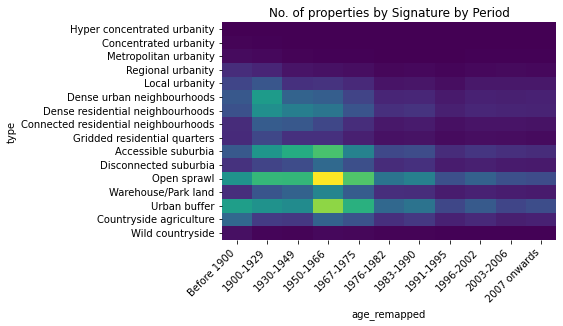

In [70]:
h = sns.heatmap(hm.reindex(age_order).T, cmap='viridis', cbar=False)
h.set_xticklabels(h.get_xticklabels(), rotation = 45, ha="right")
h.set_title('No. of properties by Signature by Period');

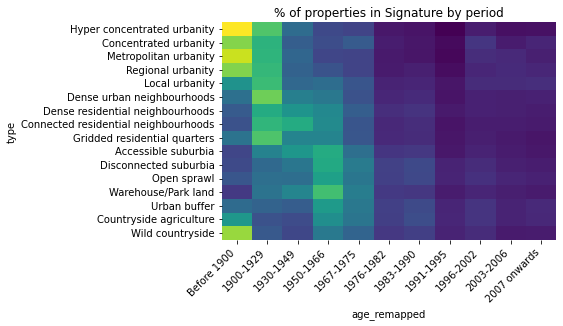

In [91]:
tab = hm.reindex(age_order).div(hm.T.sum(axis=1)).T
h = sns.heatmap(tab, cmap='viridis', cbar=False)
h.set_xticklabels(h.get_xticklabels(), rotation = 45, ha="right")
h.set_title('% of properties in Signature by period');

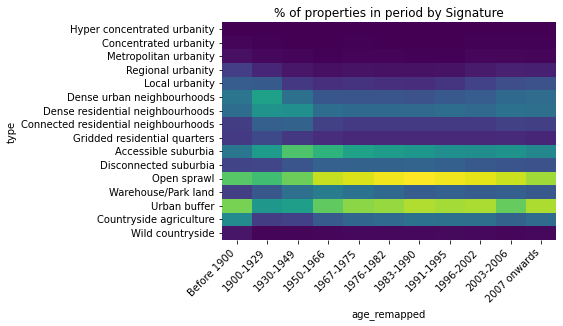

In [106]:
tab = (hm.T / hm.T.sum())[age_order]
h = sns.heatmap(tab, cmap='viridis', cbar=False)
h.set_xticklabels(h.get_xticklabels(), rotation = 45, ha="right")
h.set_title('% of properties in period by Signature');

## Land Registry

Our goal here is to create a table that records all new sales by month (since the Land Registry database starts) by spatial signature. We create it from the table of all sales by postcode by month, and write it to a manageable `.csv` file:

In [136]:
sales = (
    pandas.read_parquet(pct_p)
    .groupby(['moy', 'type'])
    ['new_sales']
    .sum()
    .unstack()
)

sales.to_csv('data/lr_sales_by_month_ss.csv')

---

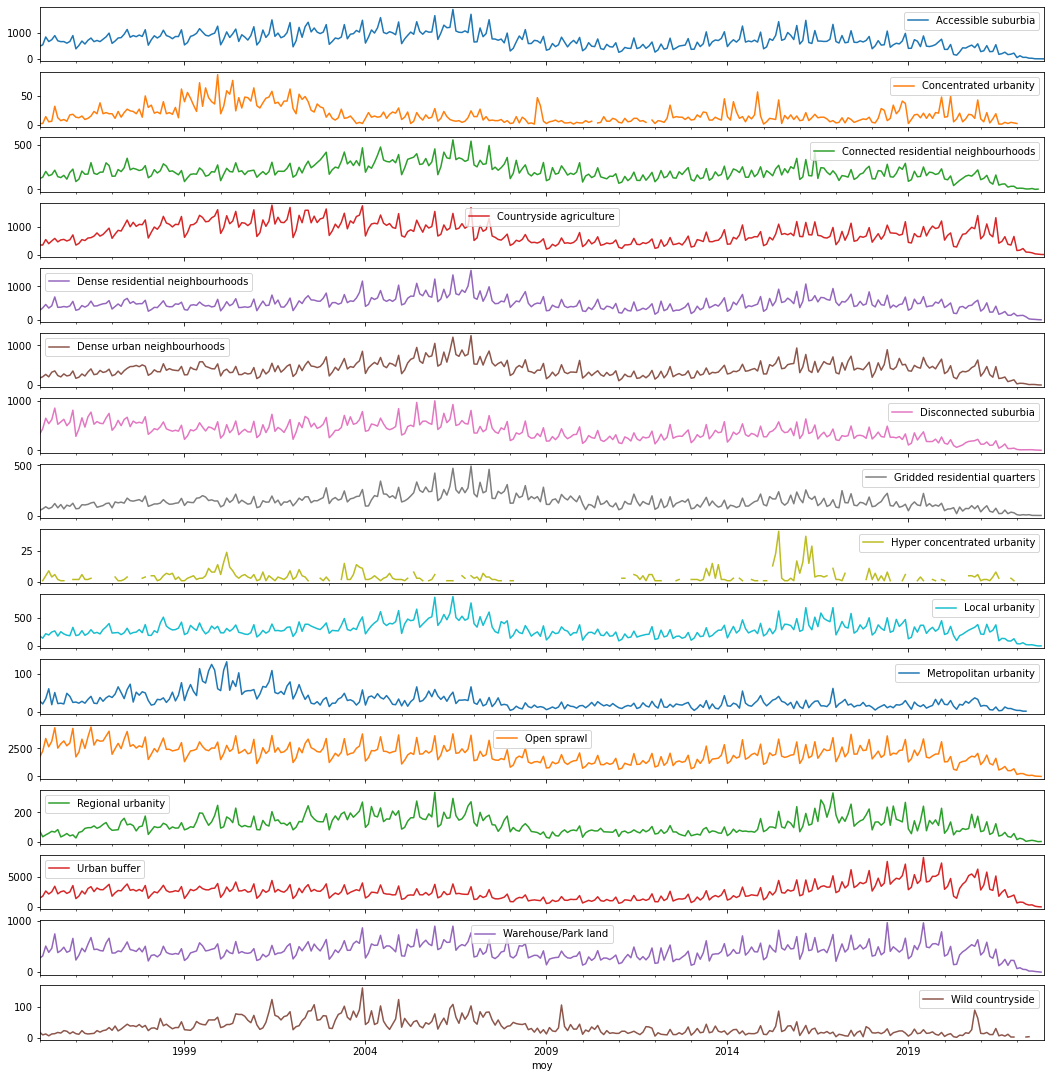

In [130]:
sales.plot(figsize=(18, 19), subplots=True, sharex=True, sharey=False);

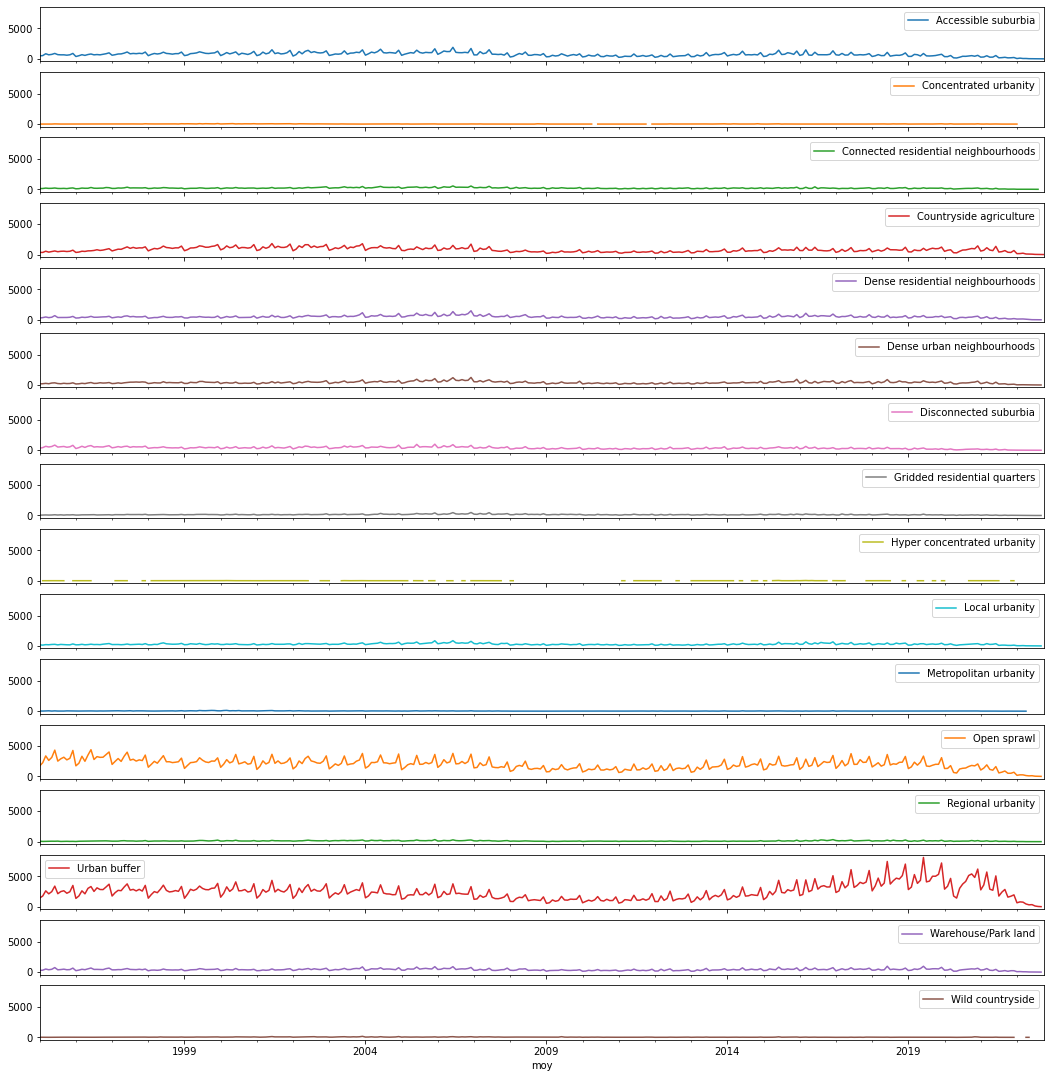

In [127]:
sales.plot(figsize=(18, 19), subplots=True, sharex=True, sharey=True);